# General Information - Learn by Building: CNN

- pembuatan model CNN untuk klasifikasi data gambar
- data source: https://www.kaggle.com/ravirajsinh45/real-life-industrial-dataset-of-casting-product

# Import Libraries

In [18]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
%matplotlib inline

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
#importing required libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix


In [26]:
my_data_dir = './data_quality_inspection/casting_data/casting_data/'
train_path = my_data_dir + 'train/'
test_path = my_data_dir + 'test/'

image_shape = (300,300,1)
batch_size = 32 #according your model and your choise


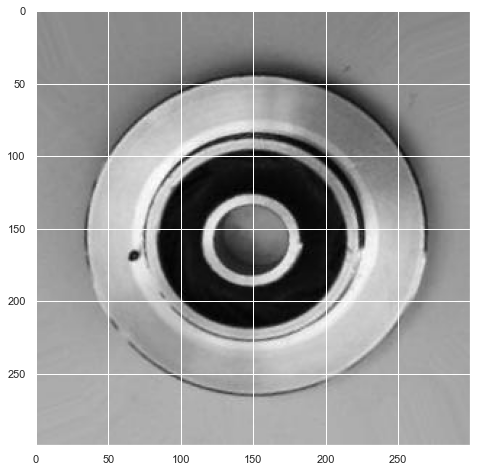

In [23]:
# view some images
img = plt.imread('./data_quality_inspection/casting_data/casting_data/train/def_front/cast_def_0_1082.jpeg')
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

In [24]:
image_gen = ImageDataGenerator(rescale=1/255)# Rescale the image by normalzing it)

In [27]:
#we using keras inbuild function to ImageDataGenerator so we donnot need to lable all images into 0 and 1 it automatic create it and batch also during trainng 
train_set = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True)

test_set = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [29]:
train_set.class_indices

{'def_front': 0, 'ok_front': 1}

In [30]:
#Creating model

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

# Last layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=2)


In [31]:
results = model.fit_generator(train_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

Epoch 1/20
208/208 [==============================] - 131s 629ms/step - loss: 0.4431 - accuracy: 0.7803 - val_loss: 0.1792 - val_accuracy: 0.9357
Epoch 2/20
208/208 [==============================] - 123s 593ms/step - loss: 0.1670 - accuracy: 0.9423 - val_loss: 0.0897 - val_accuracy: 0.9734
Epoch 3/20
163/208 [======================>.......] - ETA: 1:53 - loss: 0.0873 - accuracy: 0.9730

KeyboardInterrupt: 